In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv('alzheimers_prediction_dataset.csv')

# Exploratory Data Analysis
Get familiar with our dataset

In [21]:
# Print 5 first observations 
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [23]:
# print column types
df.dtypes

Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Level                 

#### Data Types
As most of our columns are strings(object) we will need to encode them in the next steps to numbers.
Also, there are no unnecessary columns that we can drop (such as Name, PatientID, etc...) 

In [25]:
# Missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
missing_values

Missing Values per Column:


Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

#### Missing Values 
As we can see we have no missing in our dataset which makes our work easier

In [27]:
# Summary statistics for numerical features
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


#### Check if the dataset is balanced
Plotting the distribution of the patient's diagnosis (Yes/No) to see if our dataset is balanced

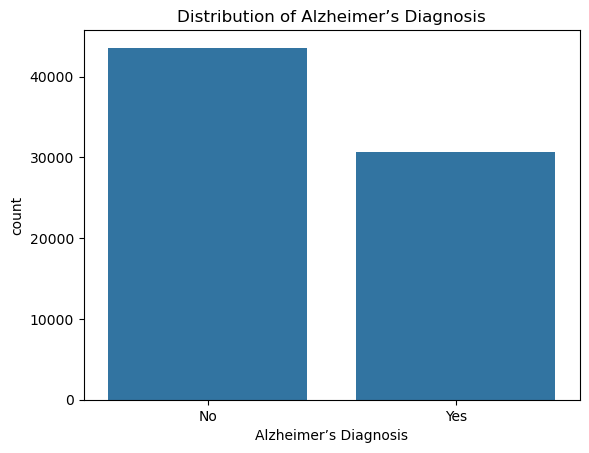

Alzheimer’s Diagnosis
No     0.586541
Yes    0.413459
Name: proportion, dtype: float64

In [33]:
# Count plot for Alzheimer’s Diagnosis
sns.countplot(data=df, x='Alzheimer’s Diagnosis')
plt.title('Distribution of Alzheimer’s Diagnosis')
plt.show()

# Check the value counts
df['Alzheimer’s Diagnosis'].value_counts(normalize=True)

Since the proportion is very close to 50/50 we can say that our dataset is balanced. 

#### Distrbution of Age vs diagnosis
We can see that for older ages there is a higher chance of alzheimer's so we can say that age is one of the most important features

C:\Users\Leontios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


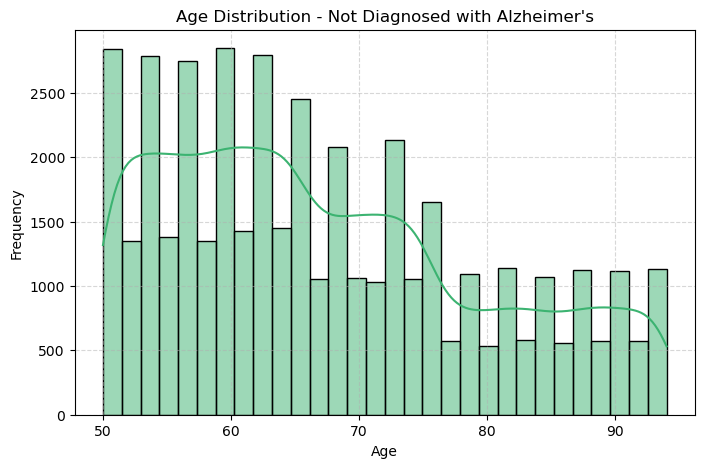

In [27]:
# Plot for 'No' (not diagnosed)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df[df['Alzheimer’s Diagnosis'] == 'No'],
    x='Age',
    bins=30,
    kde=True,
    color='mediumseagreen',
    edgecolor='black'
)
plt.title("Age Distribution - Not Diagnosed with Alzheimer's")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

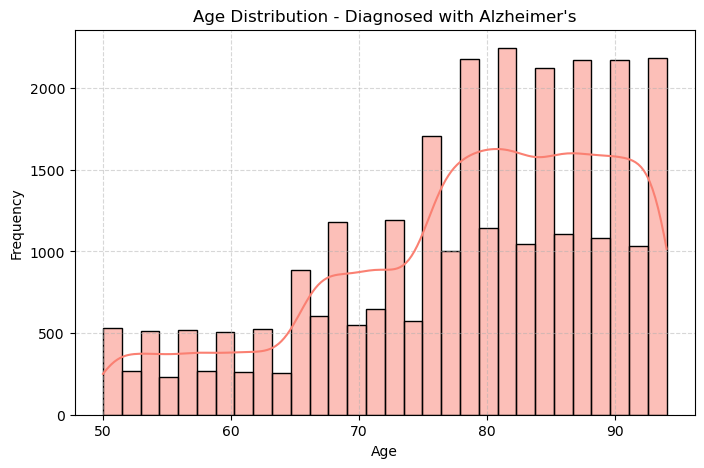

In [51]:
# Plot for 'Yes' (diagnosed)
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df[df['Alzheimer’s Diagnosis'] == 'Yes'],
    x='Age',
    bins=30,
    kde=True,
    color='salmon',
    edgecolor='black'
)
plt.title("Age Distribution - Diagnosed with Alzheimer's")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Gender vs Alzheimer's Diagnosis
We can say that the gender and the diagnosis are not correlated at all

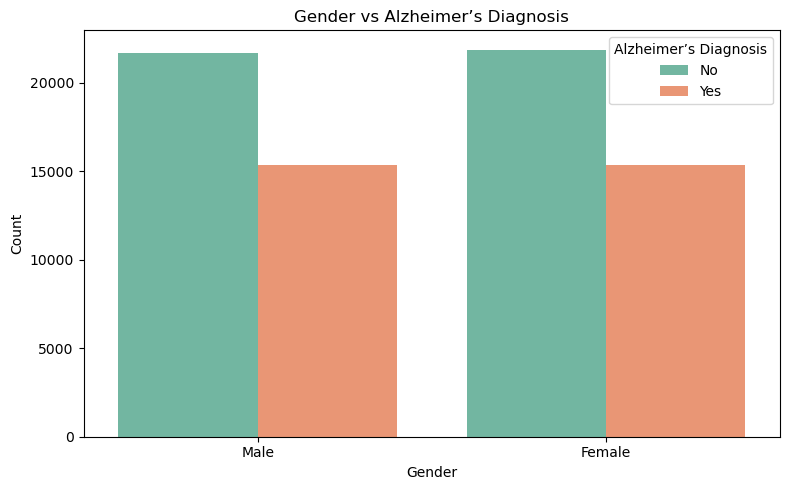

In [24]:
# Plot diagnosis per gender 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title('Gender vs Alzheimer’s Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Alzheimer’s Diagnosis')
plt.tight_layout()
plt.show()

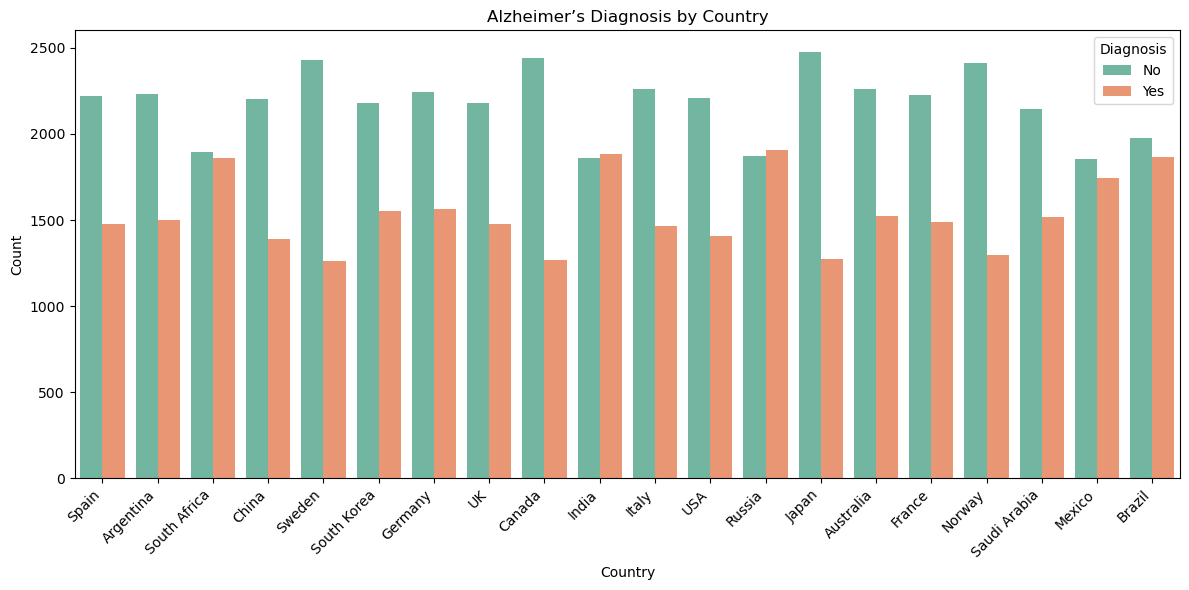

In [33]:
plt.figure(figsize=(12, 6))  # Increase width for many countries
sns.countplot(data=df, x='Country', hue='Alzheimer’s Diagnosis', palette='Set2')
plt.title('Alzheimer’s Diagnosis by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for readability
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

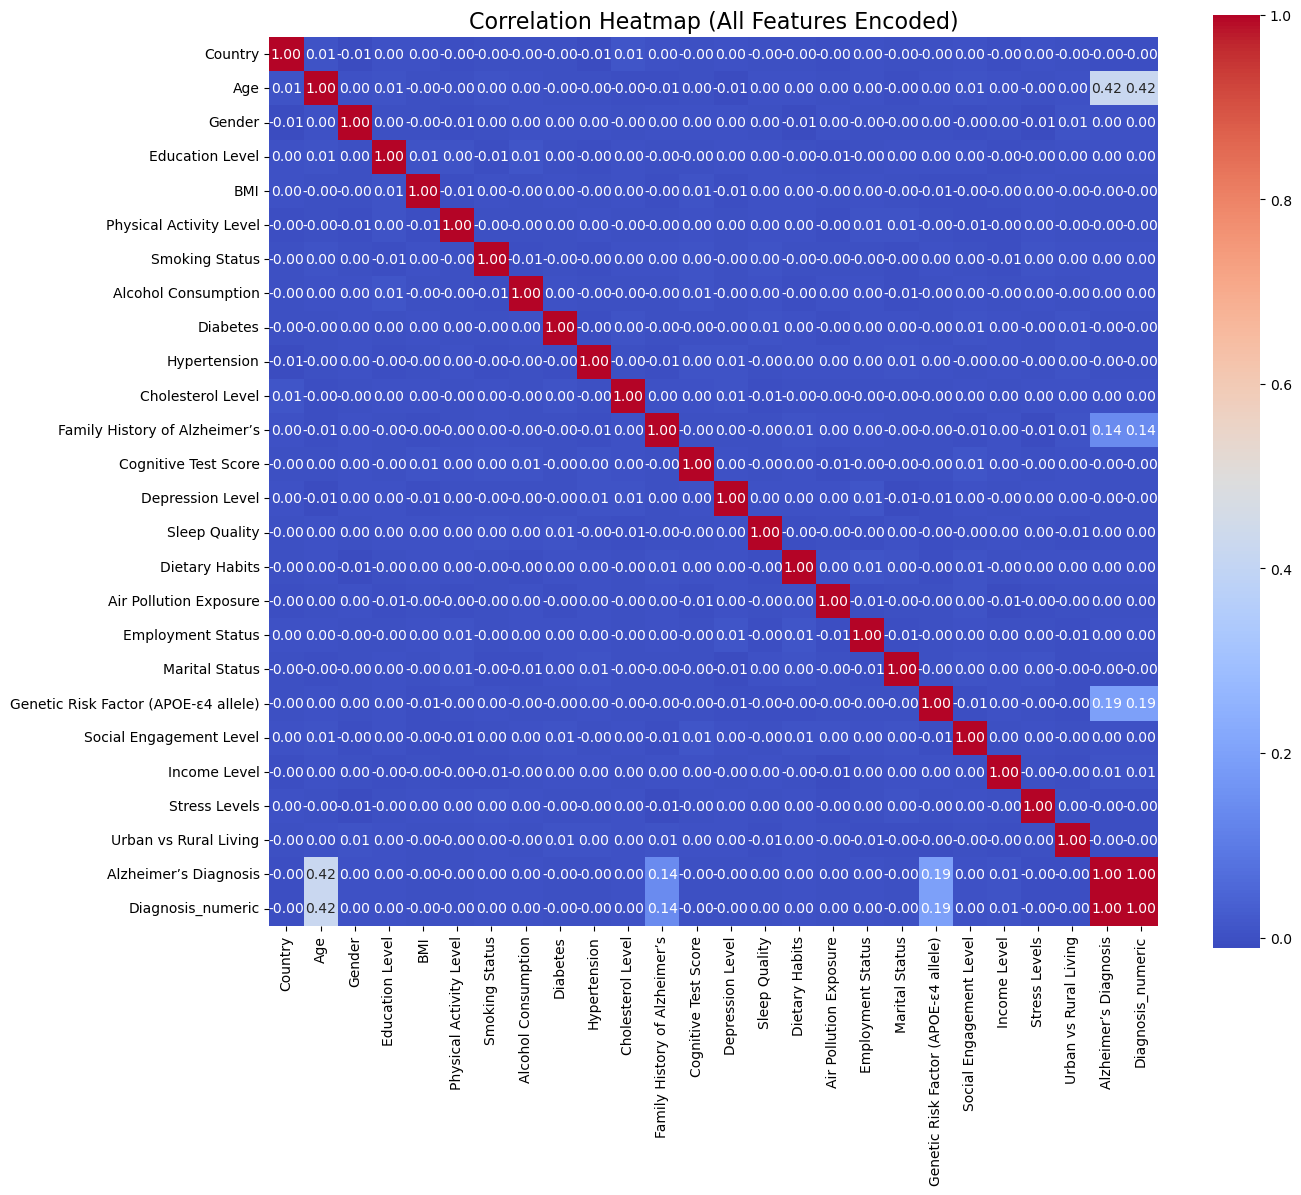

Correlation with Alzheimer’s Diagnosis:

Alzheimer’s Diagnosis                   1.000000
Age                                     0.419923
Genetic Risk Factor (APOE-ε4 allele)    0.194484
Family History of Alzheimer’s           0.140885
Income Level                            0.006209
Education Level                         0.003732
Smoking Status                          0.003690
Employment Status                       0.003514
Dietary Habits                          0.003239
Social Engagement Level                 0.002444
Cholesterol Level                       0.002104
Alcohol Consumption                     0.001790
Gender                                  0.001364
Sleep Quality                           0.000596
Air Pollution Exposure                  0.000083
Marital Status                         -0.001102
Cognitive Test Score                   -0.001142
Hypertension                           -0.001178
BMI                                    -0.001703
Depression Level            

In [83]:
# Convert target variable to numeric
df['Diagnosis_numeric'] = df['Alzheimer’s Diagnosis'].map({'No': 0, 'Yes': 1})

# Make a copy of the dataframe for encoding
df_encoded = df.copy()

# Encode all categorical features using Label Encoding (for correlation purposes only)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Calculate correlation matrix
corr_matrix_all = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap (All Features Encoded)", fontsize=16)
plt.tight_layout()
plt.show()

# Optional: Print sorted correlations with Diagnosis
cor_target = corr_matrix_all['Diagnosis_numeric'].drop('Diagnosis_numeric').sort_values(ascending=False)
print("Correlation with Alzheimer’s Diagnosis:\n")
print(cor_target)